In [1]:
! pip install plotnine

In [2]:
import pandas as pd
from plotnine import *
from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA, TruncatedSVD
from util.datasource import anything, corroles
from util.analysis import ext_modes, plot_selector, perc_comp, perc_ext


In [3]:
df = corroles.dataFrame

In [4]:
conformation = df[perc_ext].fillna(0)
# conformation["Doop"] = df["Doop (exp.)"]
# conformation["Cavity"] = df["Cavity"]

In [5]:
tsne = TSNE(n_components=2)

In [6]:
X = conformation.values

In [7]:
mapping_tsne = tsne.fit_transform(X)

In [8]:
df_tsne = pd.DataFrame(mapping_tsne, columns=["x", "y"])

In [9]:
df_tsne["category"] = df["category"]
df_tsne["CCDC"] = df["CCDC"]
df_tsne["M"] = df["M"]
df_tsne["Group"] = df["Group"]
df_tsne["Doop"] = df["Doop (exp.)"]
df_tsne["Cavity"] = df["Cavity"]
df_tsne = df_tsne.astype({"Group": "str"})
df_tsne


,x,y,category,CCDC,M,Group,Doop,Cavity
0,-12.297829,2.313573,f-Block Corrole,1524773,Dy,Ln,0.176309,6.654947
1,29.244097,-1.064758,f-Block Corrole,1482209,Ce,Ln,0.769404,7.231808
2,31.376951,-10.828253,f-Block Corrole,930334,U,Ln,1.237161,7.232352
3,31.662037,-11.142386,f-Block Corrole,930333,Th,Ln,1.278831,7.374410
4,35.911446,-4.486472,f-Block Corrole,1498989,Lu,Ln,1.115809,7.475076
...,...,...,...,...,...,...,...,...
581,-6.019557,19.034370,Freie Corrol Basen,1901425,H,1,1.225750,7.536049
582,-9.024693,13.592897,Freie Corrol Basen,1439714,H,1,1.308250,7.612757
583,-23.567602,10.303477,Freie Corrol Basen,1439715,H,1,1.455821,7.555179
584,-24.495028,9.812019,Freie Corrol Basen,1062260,H,1,1.736491,7.501071


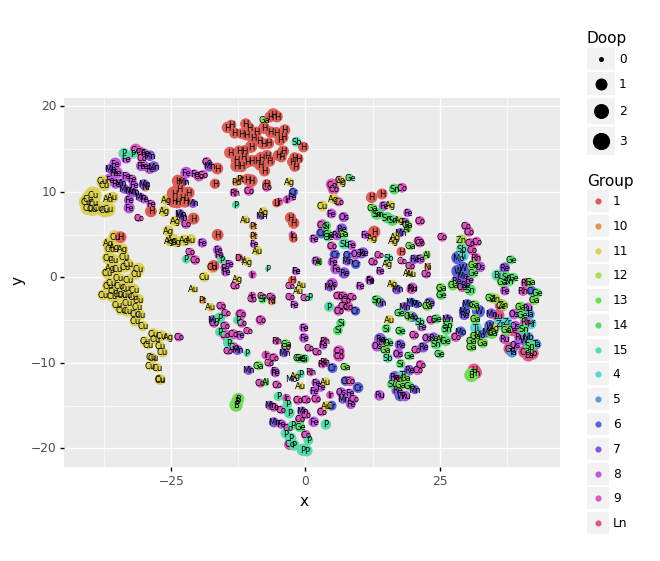

<ggplot: (81285351677)>

In [10]:
ggplot(df_tsne, aes(x="x", y="y")) + geom_point(aes(label="M", colour="Group", size="Doop")) + geom_text(aes(label="M"), size=6)
